In [5]:
# based on this code: https://learnopencv.com/blob-detection-using-opencv-python-c/
# Standard imports
import cv2
import numpy as np;
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]

from scipy import ndimage as ndi
# from skimage.util import random_noise
# from skimage import feature

In [2]:
def cv2_imshow(im):
    plt.imshow(im[:,:,::-1])

def cv2_imshowbw(im):
    plt.imshow(im,cmap='gray')

In [41]:
def draw_cross_keypoints(img, keypoints, color):
    """ Draw keypoints as crosses, and return the new image with the crosses. """
    img_kp = img.copy()  # Create a copy of img

    # Iterate over all keypoints and draw a cross on evey point.
    for kp in keypoints:
        x, y = kp.pt  # Each keypoint as an x, y tuple  https://stackoverflow.com/questions/35884409/how-to-extract-x-y-coordinates-from-opencv-cv2-keypoint-object

        x = int(round(x))  # Round an cast to int
        y = int(round(y))

        # Draw a cross with (x, y) center
        cv2.drawMarker(img_kp, (x, y), color, markerType=cv2.MARKER_CROSS, markerSize=50, thickness=10, line_type=cv2.LINE_8)

    return img_kp  # Return the image with the drawn crosses.


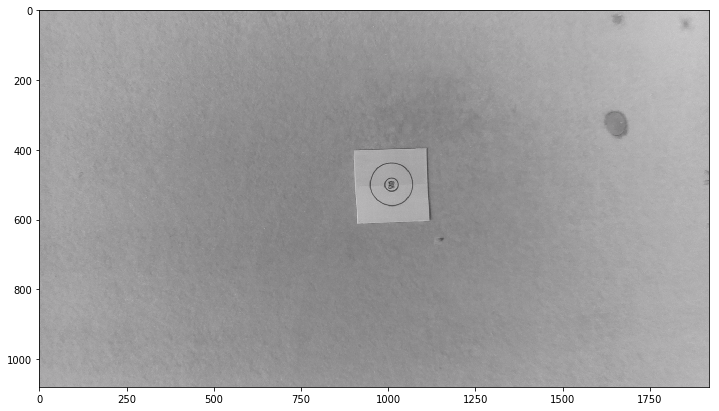

In [6]:
# Read image
im = cv2.imread("photo_60_23.545.png")
cv2_imshowbw(im)

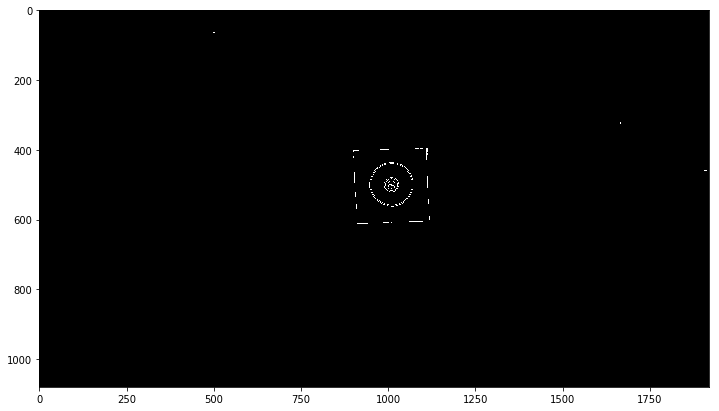

In [9]:
edges = cv2.Canny(im,100,200)
cv2_imshowbw(edges)

In [29]:
blurred = cv2.GaussianBlur(im, (3, 3), 0)
thresh = cv2.threshold(blurred, 120, 250,cv2.THRESH_BINARY)[1]
canny = cv2.Canny(thresh, 150, 255, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate = cv2.dilate(canny, kernel, iterations=1)

# cv2_imshowbw(blurred)
# plt.show()
# cv2_imshowbw(thresh)
# plt.show()
# cv2_imshowbw(canny)
# plt.show()
# cv2_imshowbw(dilate)

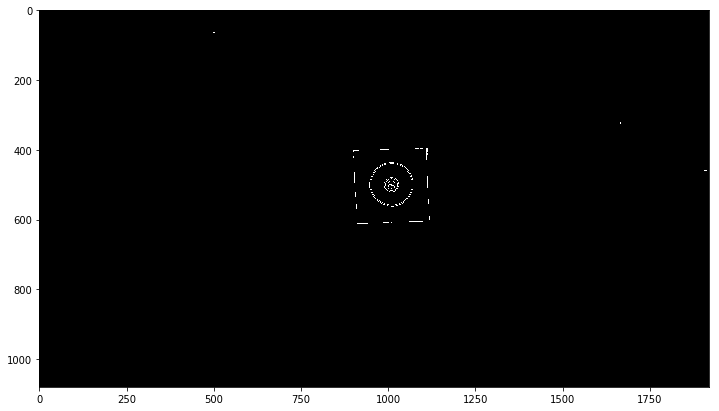

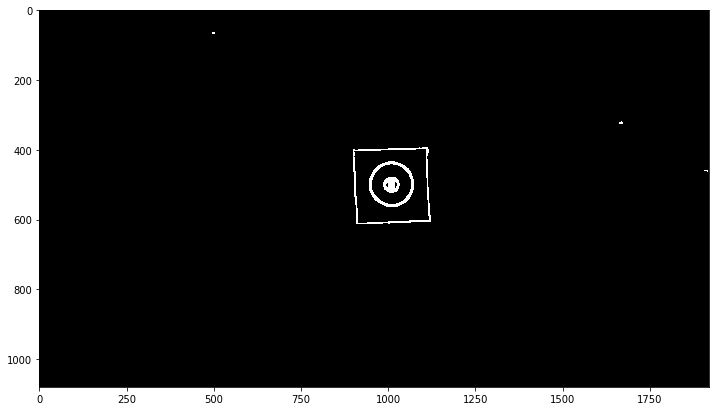

In [31]:
canny = cv2.Canny(im, 100, 200)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate = cv2.dilate(canny, kernel, iterations=1)

cv2_imshowbw(canny)
plt.show()
cv2_imshowbw(dilate)

contours detected: 0


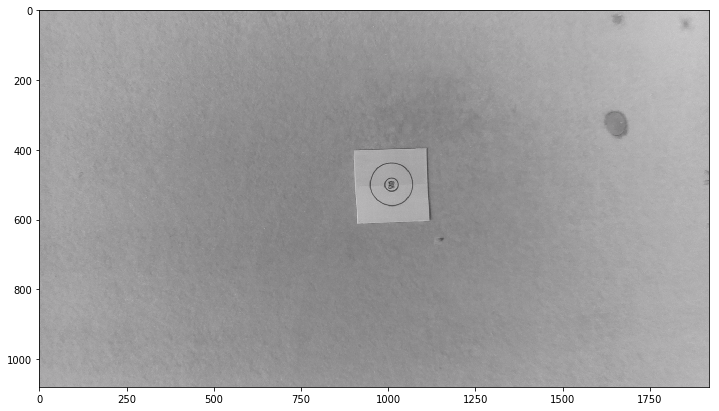

In [36]:
# Find contours in the image
cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

contours = []

threshold_min_area = 110
threshold_max_area = 120

for c in cnts:
    area = cv2.contourArea(c)
    if area > threshold_min_area and area < threshold_max_area:
        cv2.drawContours(original_image,[c], 0, (0,255,0), 3)
        contours.append(c)

cv2_imshow(im) 
print('contours detected: {}'.format(len(contours)))

In [37]:
mask=dilate

found blobs: 4


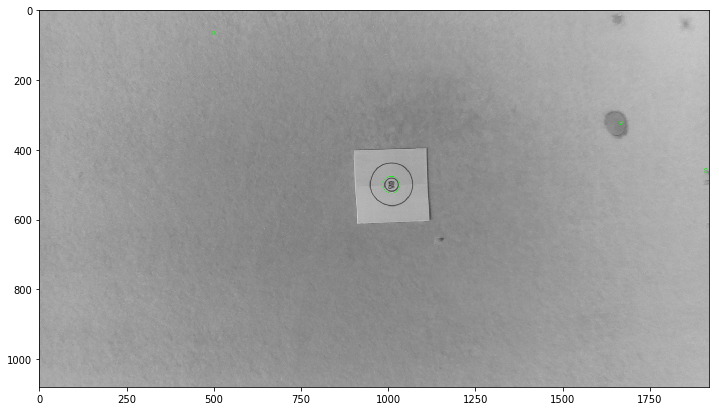

In [40]:
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 1
params.maxThreshold = 255
params.filterByArea = True
params.minArea = 1
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False
detector = cv2.SimpleBlobDetector_create(params)

# detector = cv2.SimpleBlobDetector_create()

reversemask=255-mask
keypoints = detector.detect(reversemask)

if keypoints:
    print("found blobs: "+str(len(keypoints)))
    if len(keypoints) > 4:
        keypoints.sort(key=(lambda s: s.size))
        keypoints=keypoints[0:3]
    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    cv2_imshow(im_with_keypoints)
else:
    print("no blobs")
    im_with_keypoints=crop_frame

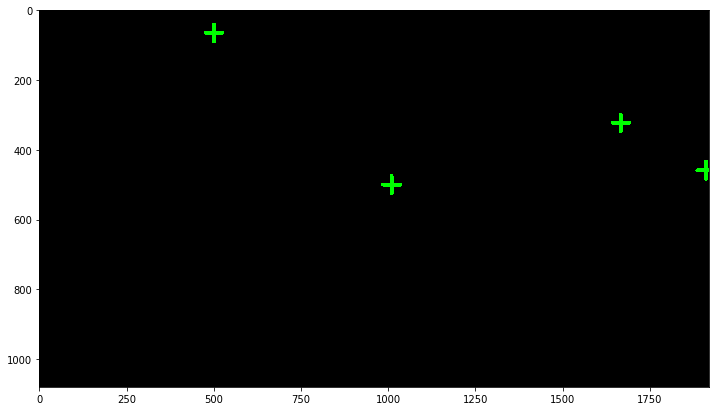

In [43]:
blob_img = draw_cross_keypoints(im*0, keypoints, color=(0,255,0))
cv2_imshow(blob_img)